In [1]:
import pandas as pd
import sys

sys.path.append("../..")
from common.utils import timestep_csv_names

In [2]:
import os
root_dir = "../../../data/one_day_data/"
assert os.path.exists(root_dir)

In [3]:
_timestep_csv_names = timestep_csv_names(delta=10)

dates, rain_amounts, start_times = [], [], []
for year in os.listdir(root_dir):
    for month in os.listdir(root_dir + f"/{year}"):
        for date in os.listdir(root_dir + f"/{year}/{month}"):
            max_rainfall = 0
            minimum_data_length = 40
            start_time = "0-0"
            for csv_filename in _timestep_csv_names:
                csv_path = os.path.join(
                        root_dir,
                        year, month, date, csv_filename
                    )
                parquet_path = csv_path.replace(".csv", ".parquet.gzip")
                parquet_df = pd.read_parquet(parquet_path, engine="pyarrow")

                if parquet_df["hour-rain"].max() > max_rainfall:
                    max_rainfall = parquet_df["hour-rain"].max()
                    start_time = csv_filename.replace(".csv", "")

                if len(parquet_df.index) < minimum_data_length:
                    minimum_data_length = len(parquet_df.index)

            if minimum_data_length > 0:
                dates.append(date)
                rain_amounts.append(max_rainfall)
                start_times.append(start_time)

df = pd.DataFrame({"date": dates, "rain": rain_amounts, "time": start_times})
df = df.sort_values(by="date")
df.reset_index()
df.head()

,date,rain,time
356,2019-10-01,1.5,10-10
355,2019-10-02,52.5,7-40
360,2019-10-03,27.5,9-40
340,2019-10-04,63.5,6-10
341,2019-10-05,5.0,5-30


In [4]:
df["month"] = df["date"].apply(lambda x: x.split("-")[0] + "-" + x.split("-")[1])
df.head()

,date,rain,time,month
356,2019-10-01,1.5,10-10,2019-10
355,2019-10-02,52.5,7-40,2019-10
360,2019-10-03,27.5,9-40,2019-10
340,2019-10-04,63.5,6-10,2019-10
341,2019-10-05,5.0,5-30,2019-10


In [5]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# ax = sns.lineplot(data=df, x="date", y="rain")
# first_dates = df.groupby(by=["month"]).min()["date"].values.tolist()
# ax.set_xticks(first_dates)
# ax.set_xticklabels(first_dates, rotation=70)
# ax.set_title("The change of daily max hourly rainfall")
# ax.set_ylabel("Hourly Rainfall (mm/h)")
# ax.set_xlabel("Date")
# plt.show()
# plt.close()

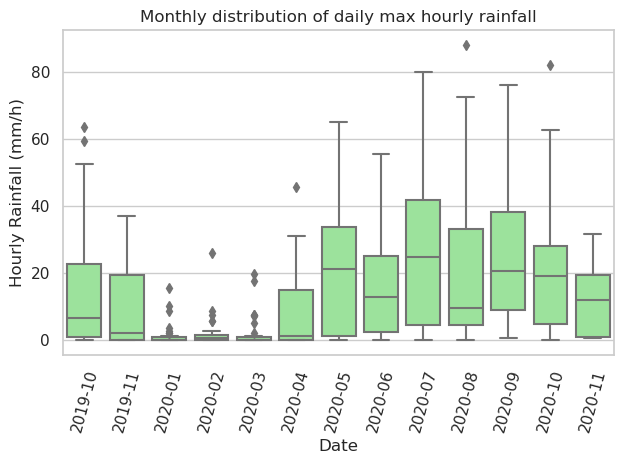

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

df["fifty"] = 50
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df, x="month", y="rain", color="lightgreen")
# sns.pointplot(data=df, x="month", y="fifty",  markers=["."], linestyles=["--"], color="red")
# monthes = df["month"].unique().tolist()
# ax.set_xticks(monthes)
# ax.set_xticklabels(monthes, rotation=70)
plt.xticks(rotation=75)
ax.set_title("Monthly distribution of daily max hourly rainfall")
ax.set_ylabel("Hourly Rainfall (mm/h)")
ax.set_xlabel("Date")

plt.tight_layout()
plt.savefig("./rain_boxplot.png")
plt.show()
plt.close()